In [53]:
import os, sys
import pandas as pd
import numpy as np
import utils
import json
import matplotlib.pyplot as plt

In [132]:
config_file = './config_file.json'
n_fold = 0
params = utils.Params(config_file)
experiment_output_folder = os.path.join('.', 'Experiments', params.hash, 
        'fold_'+str(n_fold))

figures_folder = os.path.join('.', 'Experiments', params.hash, 'Figures')
utils.create_folder(figures_folder)

0

In [12]:
eval_folder = os.path.join(experiment_output_folder, 'evaluation_results')
json_files = os.listdir(eval_folder)

In [48]:
json_file = json_files[0]
for j, json_file in enumerate(json_files):
    with open(os.path.join(eval_folder, json_file)) as file:
        data = json.load(file)
    df_temp = pd.DataFrame(list(zip(data.keys(), data.values())), columns=['metric', 'value'])
    df_temp
    if j == 0:        
        df = pd.DataFrame(columns=df_temp['metric'].values)
    df.loc[df.shape[0]] = df_temp['value'].values

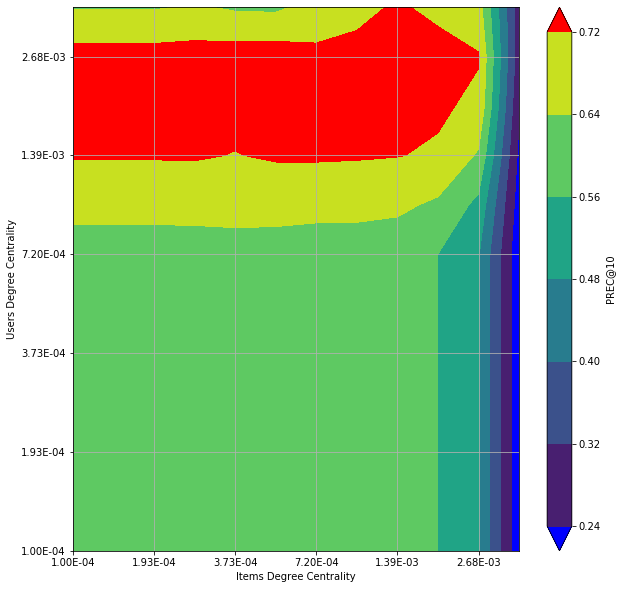

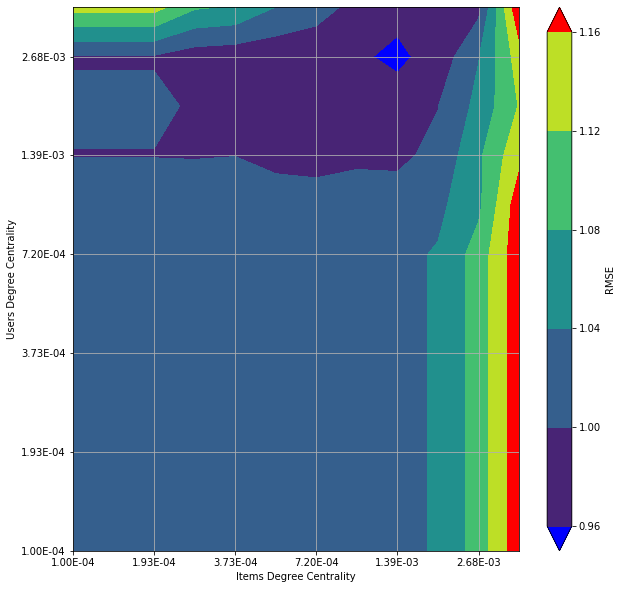

In [136]:
for metric in ['PREC@10', 'RMSE']:
    z = np.zeros([len(df['degree_item_thr'].unique()), len(df['degree_user_thr'].unique())])
    x = np.sort(df['degree_item_thr'].unique())
    y = np.sort(df['degree_user_thr'].unique())
    for u, degree_user_thr in enumerate(y):
        for i, degree_item_thr in enumerate(x):
            cond1 = df['degree_item_thr'] == degree_item_thr
            cond2 = df['degree_user_thr'] == degree_user_thr
            df_temp = df[cond1 & cond2][metric].reset_index(drop=True) 
            if df_temp.shape[0] == 0:
                print (degree_item_thr, degree_user_thr)        
            z[u][i] = df_temp[0]

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    cmap = plt.cm.get_cmap("viridis")
    cs = ax.contourf(z, cmap=cmap, extend='both')
    ax.set_xticklabels(['{:.02E}'.format(x_value) for x_value in x])
    ax.set_yticklabels(['{:.02E}'.format(y_value) for y_value in y])
    ax.grid(True)
    ax.set_ylabel('Users Degree Centrality')
    ax.set_xlabel('Items Degree Centrality')
    cs.cmap.set_over('red')
    fig.colorbar(cs, ax=ax, shrink=1, label=metric)
    cs.changed()

    fig.savefig(os.path.join(figures_folder, metric + '.jpeg'), bbox_inches='tight')